In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['orders_train.txt']), sep=";")

In [ ]:
#melihat atribut yang ada pada dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderItemID     481092 non-null  int64  
 1   orderDate       481092 non-null  object 
 2   deliveryDate    481092 non-null  object 
 3   itemID          481092 non-null  int64  
 4   size            481092 non-null  object 
 5   color           481092 non-null  object 
 6   manufacturerID  481092 non-null  int64  
 7   price           481092 non-null  float64
 8   customerID      481092 non-null  int64  
 9   salutation      481092 non-null  object 
 10  dateOfBirth     481092 non-null  object 
 11  state           481092 non-null  object 
 12  creationDate    481092 non-null  object 
 13  returnShipment  481092 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 51.4+ MB


In [ ]:
#untuk memperlihatkan dataset 10 baris pertama
df2.head(10)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,?,22,m,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0
4,5,2012-04-02,1990-12-31,151,39,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
5,6,2012-04-02,1990-12-31,598,xxl,brown,87,89.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
6,7,2012-04-02,1990-12-31,15,39,black,1,129.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
7,8,2012-04-02,2012-04-03,32,xxl,brown,3,21.90,850,Mrs,1948-04-08,North Rhine-Westphalia,2011-02-16,1
8,9,2012-04-02,2012-04-03,32,xxl,red,3,21.90,850,Mrs,1948-04-08,North Rhine-Westphalia,2011-02-16,1
9,10,2012-04-02,2012-04-03,57,xxl,green,3,39.90,850,Mrs,1948-04-08,North Rhine-Westphalia,2011-02-16,1


In [ ]:
#cek nilai kosong atau null pada atribut
df2.isna().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
returnShipment    0
dtype: int64

In [ ]:
#melihat jumlah record yang ada "?" disetiap atribut
df2.isin(['?']).sum()

orderItemID           0
orderDate             0
deliveryDate      39419
itemID                0
size                  0
color               143
manufacturerID        0
price                 0
customerID            0
salutation            0
dateOfBirth       48889
state                 0
creationDate          0
returnShipment        0
dtype: int64

In [ ]:
#melihat banyak data deliveryDate yang tahunnya 1990
df2['deliveryDate'].str.contains("1990").sum()

4660

In [ ]:
#melihat banyak data dateOfBirth yang tahunnya 1655
df2['dateOfBirth'].str.contains("1655").sum()

3

Terdapat data yang tidak valid pada attribut beberapa attribut berupa '?' dan datetime dengan nilai tahun yang tidak masuk akal seperti '1990' dan '1655'

In [ ]:

df2.orderDate.loc[(df2.deliveryDate == '?')].value_counts(dropna = False)

2012-06-27    1000
2012-06-28     716
2012-06-29     671
2012-06-30     456
2012-06-26     367
              ... 
2012-07-16      22
2012-12-28      22
2012-09-08      22
2012-07-26      17
2012-12-30       7
Name: orderDate, Length: 365, dtype: int64

Mengubah data deliveryDate dan dateOfBirth dengan tahun invalid menjadi '?' agar saat akan diubah tipe datanya dapat diseragamkan dengan datetime64 yang invalid lainnya

In [ ]:
df2.loc[(df2.deliveryDate.str.contains("1990")), 'deliveryDate'] = '?'
df2.loc[(df2.dateOfBirth.str.contains("1655")), 'dateOfBirth'] = '?'

In [ ]:
#mengubah data '?' pada deliveryDate dan dateOfBirth menjadi '1900-10-10' agar tipe datanya sama
df2.loc[(df2.deliveryDate == '?'), "deliveryDate"] = '1900-10-10'
df2.loc[(df2.dateOfBirth == '?'), "dateOfBirth"] = '1900-10-10'

In [ ]:
#mengecek lagi apakah masih ada '?' pada deliveryDate dan dateOfBirth
df2.isin(['?']).sum()

orderItemID         0
orderDate           0
deliveryDate        0
itemID              0
size                0
color             143
manufacturerID      0
price               0
customerID          0
salutation          0
dateOfBirth         0
state               0
creationDate        0
returnShipment      0
dtype: int64

In [ ]:
#mengecek apakah data yang '?' pada atribut deliveryDate dan dateOfBirth berhasil diganti
df2.isin(['1900-10-10']).sum()

orderItemID           0
orderDate             0
deliveryDate      44079
itemID                0
size                  0
color                 0
manufacturerID        0
price                 0
customerID            0
salutation            0
dateOfBirth       48892
state                 0
creationDate          0
returnShipment        0
dtype: int64

Mengubah tipe data orderDate, deliveryDate, dateOfBirth, dan creationDate menjadi datetime64

In [ ]:
df2['orderDate'] = pd.to_datetime(df2['orderDate'])
df2['deliveryDate'] = pd.to_datetime(df2['deliveryDate'])
df2['dateOfBirth'] = pd.to_datetime(df2['dateOfBirth'])
df2['creationDate'] = pd.to_datetime(df2['creationDate'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   orderItemID     481092 non-null  int64         
 1   orderDate       481092 non-null  datetime64[ns]
 2   deliveryDate    481092 non-null  datetime64[ns]
 3   itemID          481092 non-null  int64         
 4   size            481092 non-null  object        
 5   color           481092 non-null  object        
 6   manufacturerID  481092 non-null  int64         
 7   price           481092 non-null  float64       
 8   customerID      481092 non-null  int64         
 9   salutation      481092 non-null  object        
 10  dateOfBirth     481092 non-null  datetime64[ns]
 11  state           481092 non-null  object        
 12  creationDate    481092 non-null  datetime64[ns]
 13  returnShipment  481092 non-null  int64         
dtypes: datetime64[ns](4), float64(1), in

# Membuat attribut deliveryDuration (numeric of orderDate & deliveryDate)

Membuat kolom baru untuk menyimpan durasi pengiriman (deliveryDate - orderDate) yang mana akan digunakan mediannya untuk mengisi deliveryDate yang invalid

In [ ]:
#dibuat di posisi kolom ketiga dengan nilai default -1
df2.insert(3, "deliveryDuration", -1)

In [ ]:
#mengisi kolom deliveryDuration dengan selisih data deliveryDate dan orderDate yang valid
df2.loc[(df2.deliveryDate.dt.year > 1900), "deliveryDuration"] = (df2.deliveryDate.loc[(df2.deliveryDate.dt.year > 1900)] - df2.orderDate.loc[(df2.deliveryDate.dt.year > 1900)]) / np.timedelta64(1, 'D')

In [ ]:
df2.head(10)

,orderItemID,orderDate,deliveryDate,deliveryDuration,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,2.0,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,2.0,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,2.0,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,1900-10-10,-1.0,22,m,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0
4,5,2012-04-02,1900-10-10,-1.0,151,39,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
5,6,2012-04-02,1900-10-10,-1.0,598,xxl,brown,87,89.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
6,7,2012-04-02,1900-10-10,-1.0,15,39,black,1,129.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
7,8,2012-04-02,2012-04-03,1.0,32,xxl,brown,3,21.90,850,Mrs,1948-04-08,North Rhine-Westphalia,2011-02-16,1
8,9,2012-04-02,2012-04-03,1.0,32,xxl,red,3,21.90,850,Mrs,1948-04-08,North Rhine-Westphalia,2011-02-16,1
9,10,2012-04-02,2012-04-03,1.0,57,xxl,green,3,39.90,850,Mrs,1948-04-08,North Rhine-Westphalia,2011-02-16,1


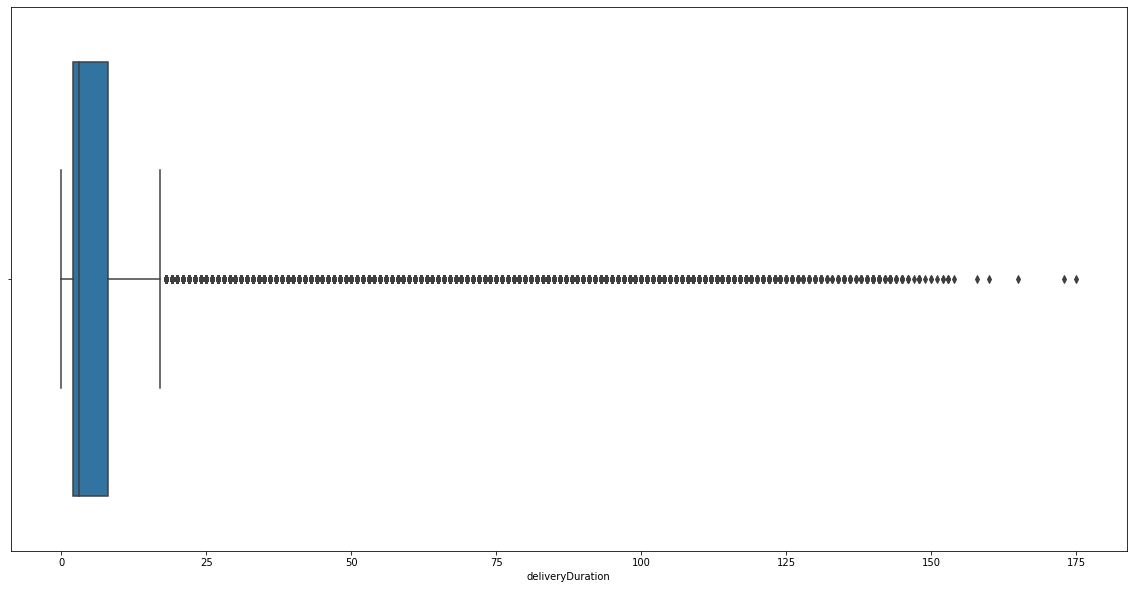

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(ax=ax, x=df2['deliveryDuration'].loc[(df2.deliveryDate.dt.year > 1900)], data=df2)

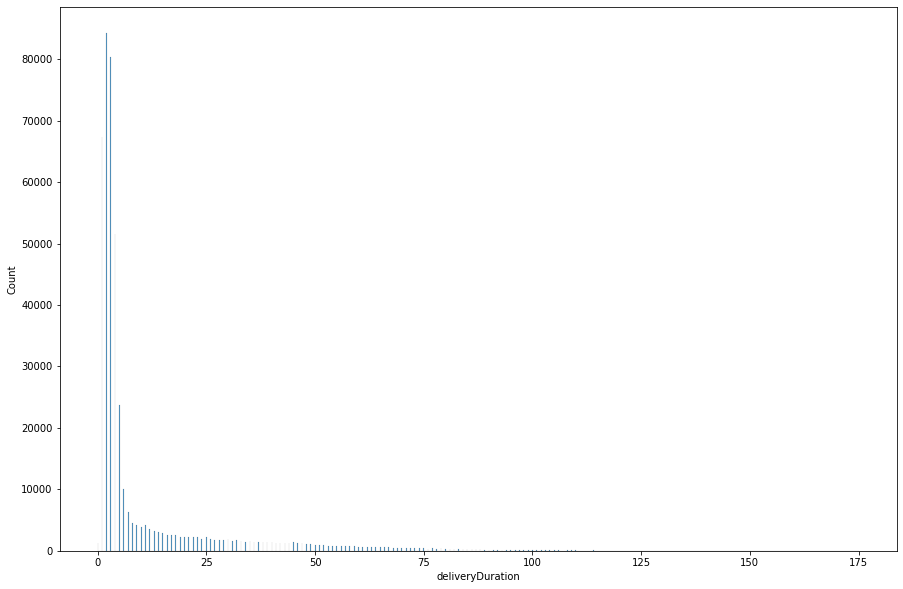

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(ax=ax, data=df2, x=df2['deliveryDuration'].loc[(df2.deliveryDate.dt.year > 1900)])

In [ ]:
df2['deliveryDuration'].loc[(df2.deliveryDate.dt.year > 1900)].describe()

count    437013.000000
mean         10.718189
std          17.951550
min           0.000000
25%           2.000000
50%           3.000000
75%           8.000000
max         175.000000
Name: deliveryDuration, dtype: float64

### **DETEKSI OUTLIER**

IQR = Q3 - Q1 

Batas atas = Q3 + 1.5(IQR)

Batas bawah = Q1 - 1.5(IQR)

sehingga: 

IQR = 8 - 2 

Batas atas = 8 + 1.5(6) 


Batas bawah = 2 - 1.5(6)

Batas atas = 17 

Batas bawah = -7, namun dalam kasus ini karena durasi negative tidak masuk akal maka batas bawah dianggap 0
sehingga data durasi pengiriman yang diatas 17 merupakan outlier

In [ ]:
upper_bound = 17
df2[['orderDate', 'deliveryDate', 'deliveryDuration']].loc[(df2.deliveryDuration > upper_bound)]

,orderDate,deliveryDate,deliveryDuration
27,2012-04-02,2012-05-04,32.0
28,2012-04-02,2012-05-04,32.0
29,2012-04-02,2012-05-04,32.0
30,2012-04-02,2012-05-04,32.0
54,2012-04-02,2012-05-17,45.0
...,...,...,...
481079,2013-03-31,2013-04-22,22.0
481082,2013-03-31,2013-05-22,52.0
481083,2013-03-31,2013-06-06,67.0
481084,2013-03-31,2013-04-18,18.0


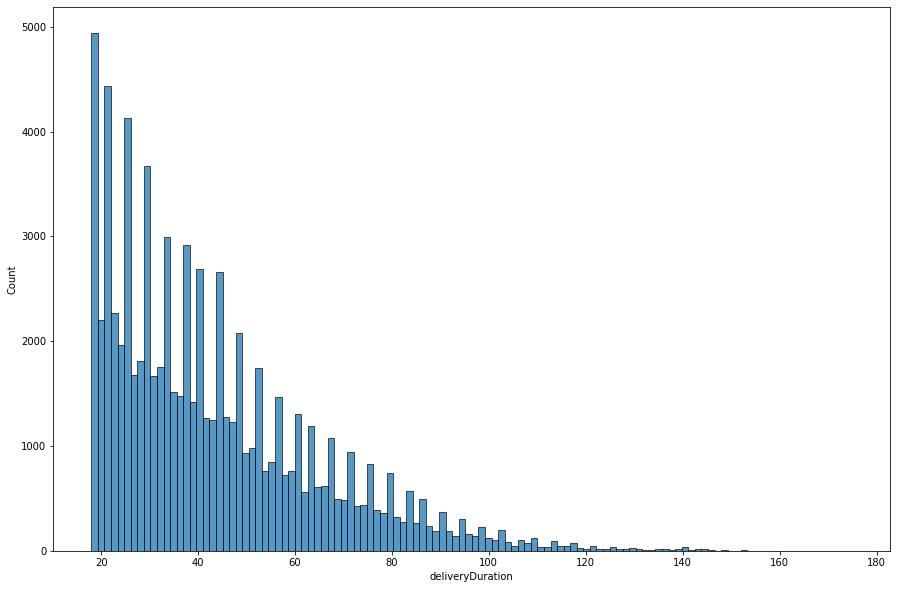

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(ax=ax, data=df2, x=df2['deliveryDuration'].loc[(df2.deliveryDuration > upper_bound)])

Karena outliernya bukan merupakan hasil dari tanggal invalid dan distribusinya terlihat alamiah, maka outlier dianggap natural dan tidak akan diubah

### **Mengubah entry deliveryDate yang tidak valid berdasarkan median dari deliveryDuration yang tidak negatif**

In [ ]:
from datetime import timedelta
deliveryDuration_median = df2['deliveryDuration'].loc[(df2.deliveryDuration >= 0)].median()
df2.loc[(df2.deliveryDate.dt.year == 1900), 'deliveryDate'] = df2['orderDate'].loc[(df2.deliveryDate.dt.year == 1900)] + timedelta(days=deliveryDuration_median)
df2.loc[(df2.deliveryDuration < 0), 'deliveryDuration'] = deliveryDuration_median

In [ ]:
df2.head(10)

,orderItemID,orderDate,deliveryDate,deliveryDuration,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,2.0,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,2.0,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,2.0,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,2012-04-05,3.0,22,m,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0
4,5,2012-04-02,2012-04-05,3.0,151,39,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
5,6,2012-04-02,2012-04-05,3.0,598,xxl,brown,87,89.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
6,7,2012-04-02,2012-04-05,3.0,15,39,black,1,129.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
7,8,2012-04-02,2012-04-03,1.0,32,xxl,brown,3,21.90,850,Mrs,1948-04-08,North Rhine-Westphalia,2011-02-16,1
8,9,2012-04-02,2012-04-03,1.0,32,xxl,red,3,21.90,850,Mrs,1948-04-08,North Rhine-Westphalia,2011-02-16,1
9,10,2012-04-02,2012-04-03,1.0,57,xxl,green,3,39.90,850,Mrs,1948-04-08,North Rhine-Westphalia,2011-02-16,1


# Membuat attribut customerAge (numeric of dateOfBirth)

In [ ]:
df2[df2.dateOfBirth == pd.Timestamp("1900-10-10")]

,orderItemID,orderDate,deliveryDate,deliveryDuration,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
14,15,2012-04-02,2012-04-03,1.0,165,37,mocca,47,89.90,858,Mrs,1900-10-10,Berlin,2012-03-29,1
93,94,2012-04-02,2012-04-03,1.0,287,41,nature,61,49.90,1000,Mrs,1900-10-10,Hamburg,2012-03-19,1
94,95,2012-04-02,2012-04-03,1.0,287,40,nature,61,49.90,1000,Mrs,1900-10-10,Hamburg,2012-03-19,1
95,96,2012-04-02,2012-04-03,1.0,278,40,ecru,50,79.95,1000,Mrs,1900-10-10,Hamburg,2012-03-19,1
96,97,2012-04-02,2012-04-03,1.0,71,9+,ocher,21,69.95,1000,Mrs,1900-10-10,Hamburg,2012-03-19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481052,481053,2013-03-31,2013-04-03,3.0,2694,42,blue,38,99.90,86558,Mrs,1900-10-10,Lower Saxony,2013-03-31,0
481053,481054,2013-03-31,2013-04-03,3.0,2663,42,blue,54,129.90,86558,Mrs,1900-10-10,Lower Saxony,2013-03-31,0
481054,481055,2013-03-31,2013-04-03,3.0,2666,42,nature,54,69.90,86558,Mrs,1900-10-10,Lower Saxony,2013-03-31,0
481055,481056,2013-03-31,2013-04-03,3.0,2666,42,purple,54,69.90,86558,Mrs,1900-10-10,Lower Saxony,2013-03-31,0


Terdapat 48892 data customerAge yang invalid

In [ ]:
max_of_dates = df2.deliveryDate.max()

In [ ]:
df2.insert(12, "customerAge", -1)

In [ ]:
df2.head(10)

,orderItemID,orderDate,deliveryDate,deliveryDuration,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,customerAge,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,2.0,186,m,denim,25,69.90,794,Mrs,1965-01-06,-1,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,2.0,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,-1,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,2.0,71,9+,curry,21,69.95,794,Mrs,1965-01-06,-1,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,2012-04-05,3.0,22,m,green,14,39.90,808,Mrs,1959-11-09,-1,Saxony,2012-01-04,0
4,5,2012-04-02,2012-04-05,3.0,151,39,black,53,29.90,825,Mrs,1964-07-11,-1,Rhineland-Palatinate,2011-02-16,0
5,6,2012-04-02,2012-04-05,3.0,598,xxl,brown,87,89.90,825,Mrs,1964-07-11,-1,Rhineland-Palatinate,2011-02-16,0
6,7,2012-04-02,2012-04-05,3.0,15,39,black,1,129.90,825,Mrs,1964-07-11,-1,Rhineland-Palatinate,2011-02-16,0
7,8,2012-04-02,2012-04-03,1.0,32,xxl,brown,3,21.90,850,Mrs,1948-04-08,-1,North Rhine-Westphalia,2011-02-16,1
8,9,2012-04-02,2012-04-03,1.0,32,xxl,red,3,21.90,850,Mrs,1948-04-08,-1,North Rhine-Westphalia,2011-02-16,1
9,10,2012-04-02,2012-04-03,1.0,57,xxl,green,3,39.90,850,Mrs,1948-04-08,-1,North Rhine-Westphalia,2011-02-16,1


Mengisi data customerAge untuk entry yang sudah memiliki nilai dateOfBirth yang valid

In [ ]:
df2.loc[(df2.dateOfBirth.dt.year > 1900), "customerAge"] = ((max_of_dates - df2.dateOfBirth.loc[(df2.dateOfBirth.dt.year > 1900)]) / np.timedelta64(1, 'D')) / 365

In [ ]:
df2.head(10)

,orderItemID,orderDate,deliveryDate,deliveryDuration,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,customerAge,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,2.0,186,m,denim,25,69.90,794,Mrs,1965-01-06,48.572603,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,2.0,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,48.572603,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,2.0,71,9+,curry,21,69.95,794,Mrs,1965-01-06,48.572603,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,2012-04-05,3.0,22,m,green,14,39.90,808,Mrs,1959-11-09,53.736986,Saxony,2012-01-04,0
4,5,2012-04-02,2012-04-05,3.0,151,39,black,53,29.90,825,Mrs,1964-07-11,49.063014,Rhineland-Palatinate,2011-02-16,0
5,6,2012-04-02,2012-04-05,3.0,598,xxl,brown,87,89.90,825,Mrs,1964-07-11,49.063014,Rhineland-Palatinate,2011-02-16,0
6,7,2012-04-02,2012-04-05,3.0,15,39,black,1,129.90,825,Mrs,1964-07-11,49.063014,Rhineland-Palatinate,2011-02-16,0
7,8,2012-04-02,2012-04-03,1.0,32,xxl,brown,3,21.90,850,Mrs,1948-04-08,65.331507,North Rhine-Westphalia,2011-02-16,1
8,9,2012-04-02,2012-04-03,1.0,32,xxl,red,3,21.90,850,Mrs,1948-04-08,65.331507,North Rhine-Westphalia,2011-02-16,1
9,10,2012-04-02,2012-04-03,1.0,57,xxl,green,3,39.90,850,Mrs,1948-04-08,65.331507,North Rhine-Westphalia,2011-02-16,1


Statistik data customerAge yang sudah terisi nilai valid

In [ ]:
df2["customerAge"].loc[(df2.customerAge > 0)].describe()

count    428053.000000
mean         48.694848
std           9.154145
min           0.068493
25%          43.186301
50%          48.446575
75%          53.991781
max         112.630137
Name: customerAge, dtype: float64

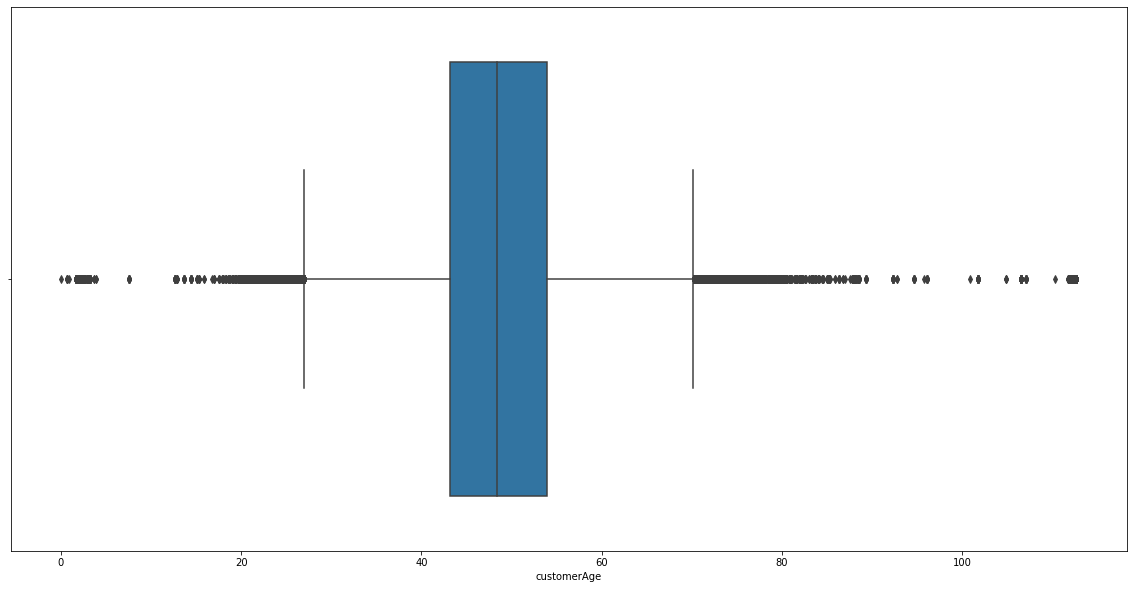

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(ax=ax, x=df2["customerAge"].loc[(df2.customerAge > -1)], data=df2)

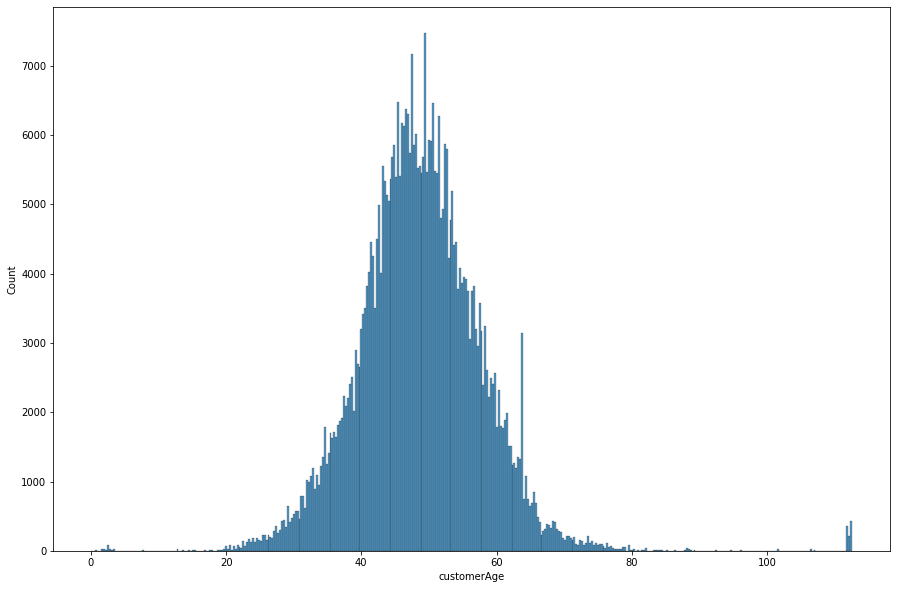

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(ax=ax, data=df2, x=df2["customerAge"].loc[(df2.customerAge > -1)])

Berdasarkan 2 grafik diatas, persebaran data tidak memiliki kecenderungan yang signifikan namun terlihat memiliki outlier di ujung-ujung ekstrimnya.

## Deteksi Outlier

IQR = 53 - 43 

Batas atas = 53 + 1.5(10) 


Batas bawah = 43 - 1.5(10)

Batas atas = 68 

Batas bawah = 28

In [ ]:
upper_bound = 68
lower_bound = 28

### Analisis Outlier

customerAge diubah ke Int agar mudah direpresentasi dalam grafik

In [ ]:
df2["customerAge"] = df2["customerAge"].astype('int')

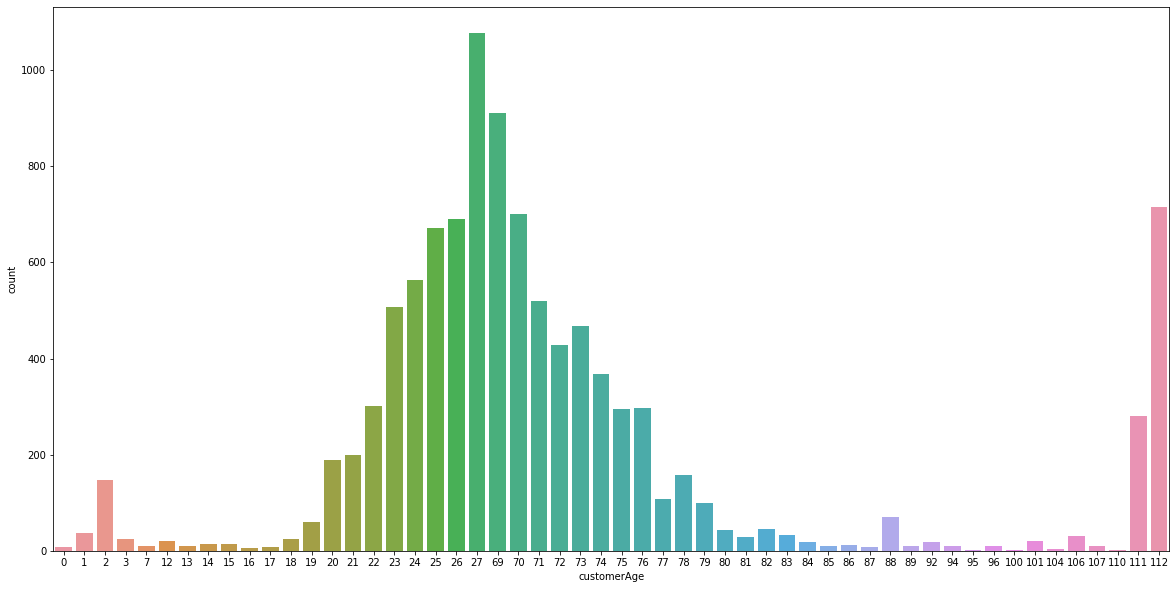

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(ax=ax, x=df2['customerAge'].loc[((df2.customerAge > upper_bound) | (df2.customerAge < lower_bound)) & (df2.customerAge > -1)], data=df2)

Berdasarkan countplot outlier diatas terdapat outlier yang tampak alamiah dan outlier yang tidak alamiah seperti pada data umur 0 dan umur 112. Untuk menangani outlier tidak alamiah, yang berada di bawah batas umur penggunaan akun google (13 tahun) akan diubah menjadi nilai lower_bound, dan yang berada di atas angka harapan hidup negara Jerman di tahun 2013 (80 tahun) akan diubah menjadi nilai upper_bound.

In [ ]:
#proses penanganan outlier diatas 80 tahun
df2.loc[((df2.customerAge > 80) & (df2.customerAge > -1)), "customerAge"] = upper_bound
df2.loc[((df2.dateOfBirth <= (max_of_dates - timedelta(days=80*365))) & (df2.dateOfBirth.dt.year != 1900)), "dateOfBirth"] = max_of_dates - timedelta(days=80*365)

#proses penanganan outlier dibawah 13 tahun
df2.loc[((df2.customerAge < 13) & (df2.customerAge > -1)), "customerAge"] = lower_bound
df2.loc[((df2.dateOfBirth >= (max_of_dates - timedelta(days=13*365))) & (df2.dateOfBirth.dt.year != 1900)), "dateOfBirth"] = max_of_dates - timedelta(days=13*365)

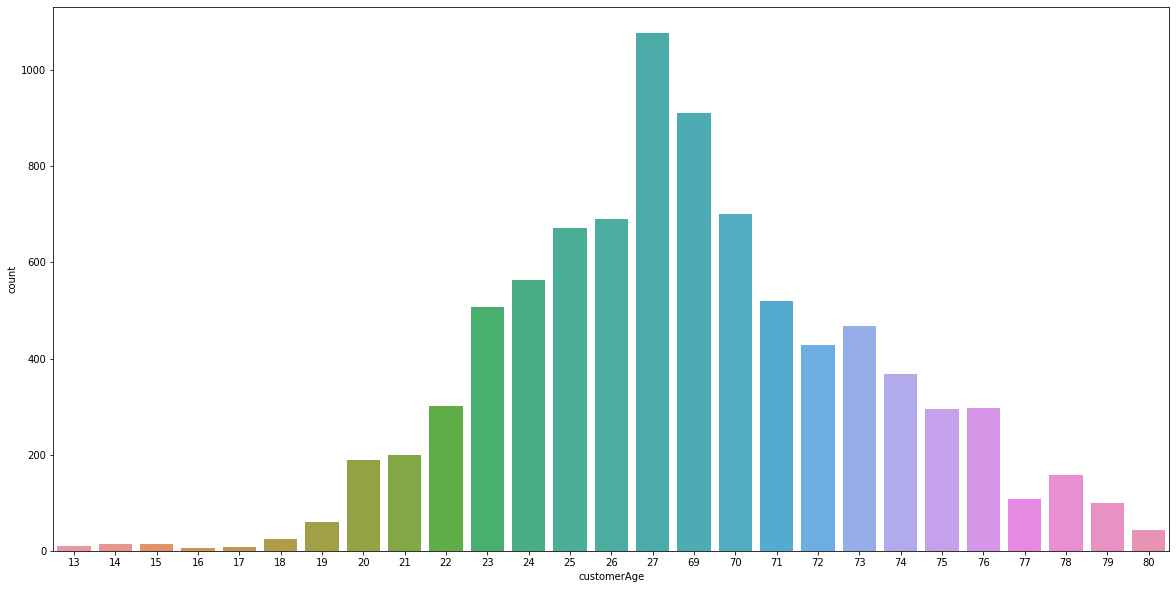

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(ax=ax, x=df2['customerAge'].loc[((df2.customerAge > upper_bound) | (df2.customerAge < lower_bound)) & (df2.customerAge > -1)], data=df2)

## Penanganan data invalid ('-1' dan '1900-10-10')

In [ ]:
df2["customerAge"].loc[(df2.customerAge > -1)].describe()

count    428053.000000
mean         48.091914
std           8.557998
min          13.000000
25%          43.000000
50%          48.000000
75%          53.000000
max          80.000000
Name: customerAge, dtype: float64

In [ ]:
custAge_mean_day = df2["customerAge"].loc[(df2.customerAge > -1)].mean() * 365
custAge_mean_day

17553.548555903122

Penanganan nilai customerAge yang -1 yaitu diisi dengan rata-rata dari customerAge yang valid

In [ ]:
df2.loc[(df2.customerAge == -1), "customerAge"] = custAge_mean_day/365

In [ ]:
df2.loc[(df2.dateOfBirth.dt.year == 1900), "dateOfBirth"] = max_of_dates - timedelta(days=custAge_mean_day)
df2["dateOfBirth"] = pd.to_datetime(df2["dateOfBirth"]).dt.date
df2["customerAge"] = df2["customerAge"].astype('int')
df2["dateOfBirth"] = pd.to_datetime(df2["dateOfBirth"])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   orderItemID       481092 non-null  int64         
 1   orderDate         481092 non-null  datetime64[ns]
 2   deliveryDate      481092 non-null  datetime64[ns]
 3   deliveryDuration  481092 non-null  float64       
 4   itemID            481092 non-null  int64         
 5   size              481092 non-null  object        
 6   color             481092 non-null  object        
 7   manufacturerID    481092 non-null  int64         
 8   price             481092 non-null  float64       
 9   customerID        481092 non-null  int64         
 10  salutation        481092 non-null  object        
 11  dateOfBirth       481092 non-null  datetime64[ns]
 12  customerAge       481092 non-null  int64         
 13  state             481092 non-null  object        
 14  crea

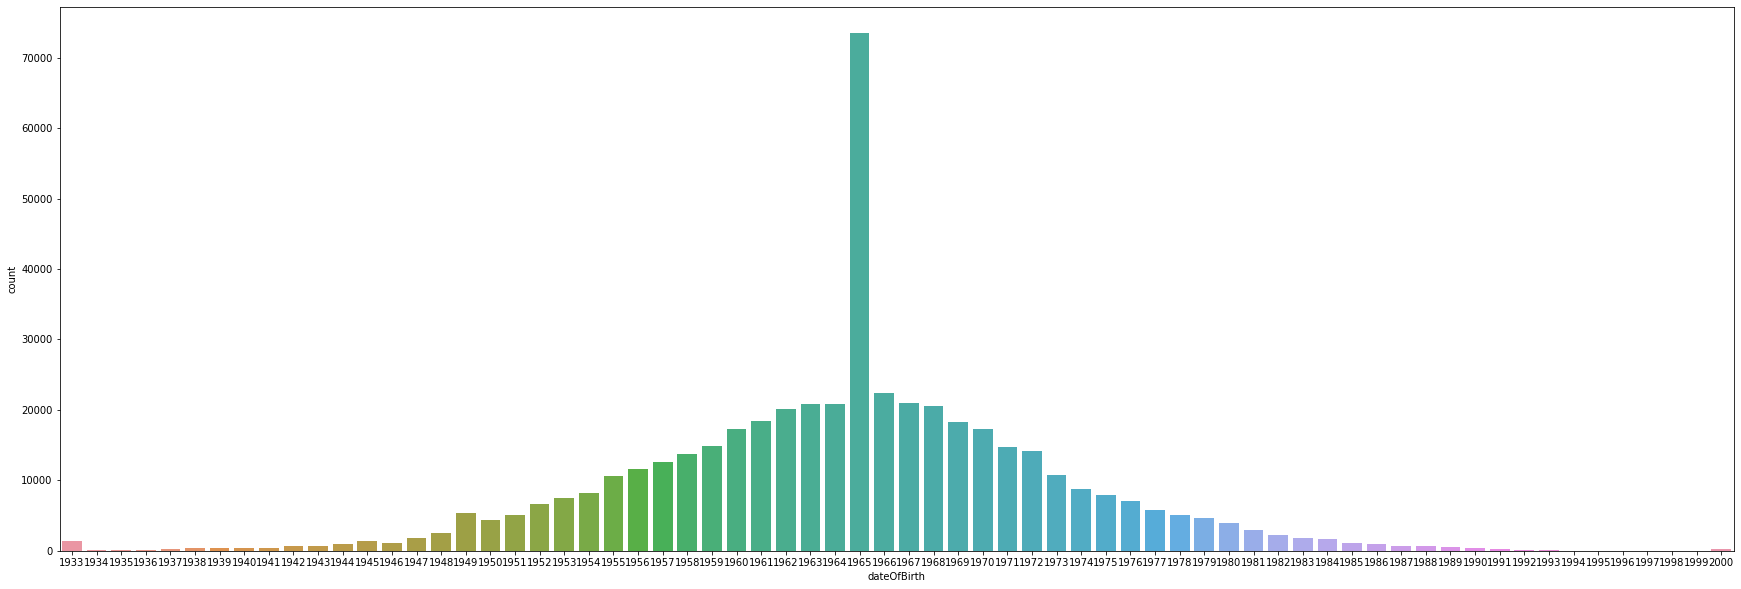

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(ax=ax, x=df2["dateOfBirth"].dt.year, data=df2)

# Membuat attribut accountAge (numeric of creationDate)

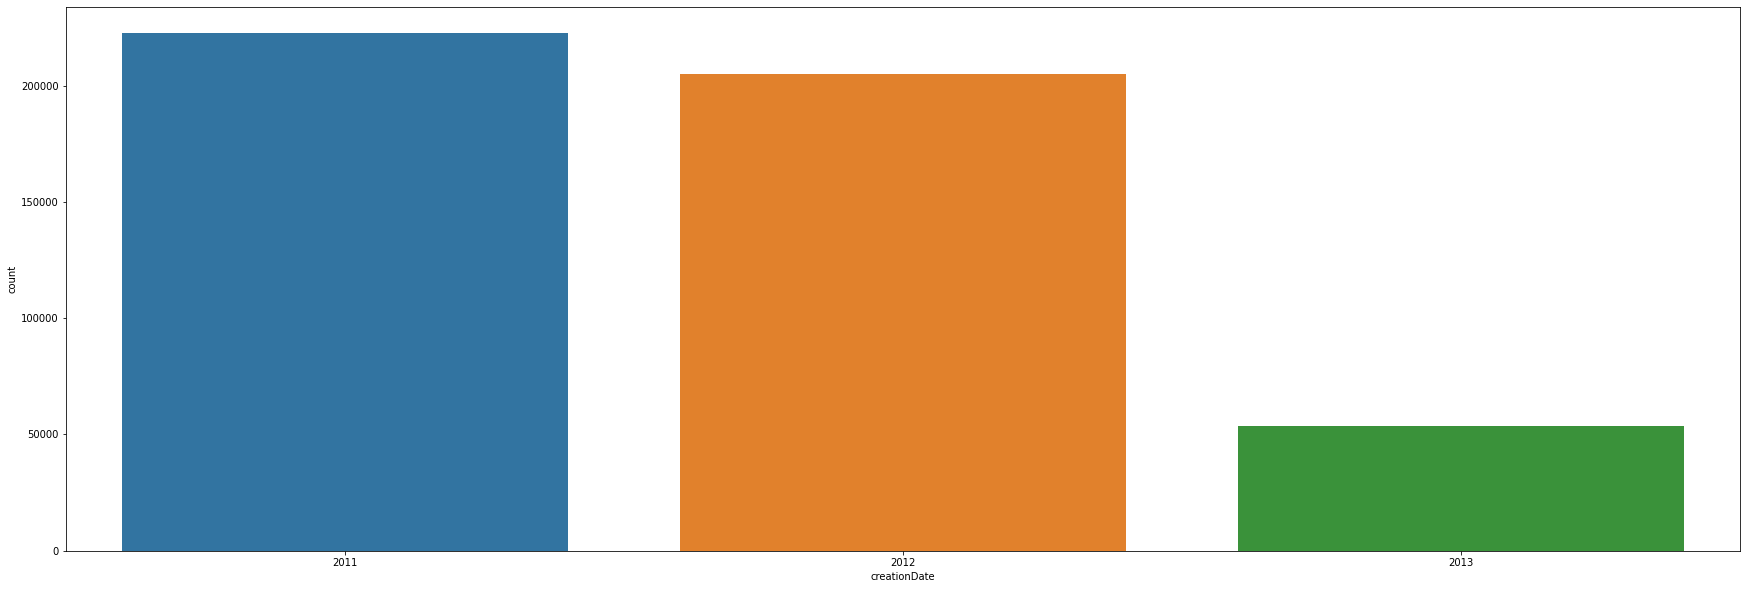

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(ax=ax, x=df2["creationDate"].dt.year, data=df2)

Membuat kolom attribut "accountAge" untuk menyimpan umur akun (dalam tahun) yang merupakan hasil dari max deliveryDate (dengan asumsi max deliveryDate merupakan current date) dikurangi creationDate

In [ ]:
df2.insert(15, "accountAge", -1)

In [ ]:
df2.head(10)

,orderItemID,orderDate,deliveryDate,deliveryDuration,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,customerAge,state,creationDate,accountAge,returnShipment
0,1,2012-04-01,2012-04-03,2.0,186,m,denim,25,69.90,794,Mrs,1965-01-06,48,Baden-Wuerttemberg,2011-04-25,-1,0
1,2,2012-04-01,2012-04-03,2.0,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,48,Baden-Wuerttemberg,2011-04-25,-1,1
2,3,2012-04-01,2012-04-03,2.0,71,9+,curry,21,69.95,794,Mrs,1965-01-06,48,Baden-Wuerttemberg,2011-04-25,-1,1
3,4,2012-04-02,2012-04-05,3.0,22,m,green,14,39.90,808,Mrs,1959-11-09,53,Saxony,2012-01-04,-1,0
4,5,2012-04-02,2012-04-05,3.0,151,39,black,53,29.90,825,Mrs,1964-07-11,49,Rhineland-Palatinate,2011-02-16,-1,0
5,6,2012-04-02,2012-04-05,3.0,598,xxl,brown,87,89.90,825,Mrs,1964-07-11,49,Rhineland-Palatinate,2011-02-16,-1,0
6,7,2012-04-02,2012-04-05,3.0,15,39,black,1,129.90,825,Mrs,1964-07-11,49,Rhineland-Palatinate,2011-02-16,-1,0
7,8,2012-04-02,2012-04-03,1.0,32,xxl,brown,3,21.90,850,Mrs,1948-04-08,65,North Rhine-Westphalia,2011-02-16,-1,1
8,9,2012-04-02,2012-04-03,1.0,32,xxl,red,3,21.90,850,Mrs,1948-04-08,65,North Rhine-Westphalia,2011-02-16,-1,1
9,10,2012-04-02,2012-04-03,1.0,57,xxl,green,3,39.90,850,Mrs,1948-04-08,65,North Rhine-Westphalia,2011-02-16,-1,1


In [ ]:
df2["accountAge"] = ((max_of_dates - df2["creationDate"]) / np.timedelta64(1, 'D')) / 365

In [ ]:
df2["accountAge"] = df2["accountAge"].astype('int')

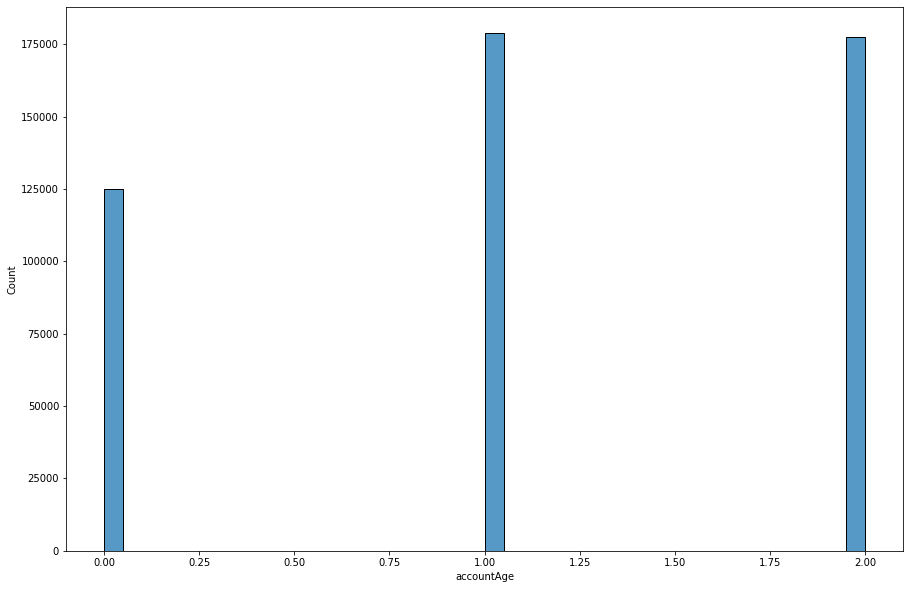

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(ax=ax, data=df2, x="accountAge")

# **BAGIAN ISI '?' & ENTRY INVALID BARU SAMPE SINI**

In [ ]:
#cek isi dari atribut salutation
df2.salutation.value_counts(dropna=False)

Mrs             461769
Mr               16720
Family            1891
Company            361
not reported       351
Name: salutation, dtype: int64

In [ ]:
#mengganti Family, Company, dan not reported pada atribut salutation menjadi other
df2.loc[(df2["salutation"] == "not reported"), "salutation"] = "other"
df2.loc[(df2["salutation"] == "Family"), "salutation"] = "other"
df2.loc[(df2["salutation"] == "Company"), "salutation"] = "other"

In [ ]:
#mengecek kembali isi atribut salutation
df2.salutation.value_counts(dropna=False)

Mrs      461769
Mr        16720
other      2603
Name: salutation, dtype: int64

In [ ]:
#melihat isi atribut color
df2.color.value_counts(dropna = False)

black            86252
blue             48180
grey             42273
red              39074
brown            32842
                 ...  
lemon                4
cortina mocca        3
perlmutt             3
bronze               2
leopard              2
Name: color, Length: 88, dtype: int64

In [ ]:
#mengganti data '?' pada atribut color dengan modus atau color yang paling banyak
df2.loc[(df2["color"] == "?"), "color"] = "black"

In [ ]:
#mengecek lagi apakah masih ada data yang isinya '?'
df2.isin(['?']).sum()

orderItemID         0
orderDate           0
deliveryDate        0
deliveryDuration    0
itemID              0
size                0
color               0
manufacturerID      0
price               0
customerID          0
salutation          0
dateOfBirth         0
customerAge         0
state               0
creationDate        0
accountAge          0
returnShipment      0
dtype: int64

In [ ]:
#mengganti data size yang hurufnya kecil menjadi huruf kapital agar seragam
df2.loc[(df2["size"] == "s"), "size"] = "S"
df2.loc[(df2["size"] == "m"), "size"] = "M"
df2.loc[(df2["size"] == "l"), "size"] = "L"
df2.loc[(df2["size"] == "xl"), "size"] = "XL"
df2.loc[(df2["size"] == "xs"), "size"] = "XS"
df2.loc[(df2["size"] == "xxl"), "size"] = "XXL"
df2.loc[(df2["size"] == "xxxl"), "size"] = "XXXL"

In [ ]:
#mengganti data size yang belakangnya terdapat tanda '+' dengan huruf untuk mengurangi variasi data
df2.loc[(df2["size"] == "9+"), "size"] = "M"
df2.loc[(df2["size"] == "10+"), "size"] = "L"
df2.loc[(df2["size"] == "8+"), "size"] = "M"
df2.loc[(df2["size"] == "42+"), "size"] = "L"
df2.loc[(df2["size"] == "4+"), "size"] = "XS"
df2.loc[(df2["size"] == "6+"), "size"] = "S"
df2.loc[(df2["size"] == "7+"), "size"] = "S"
df2.loc[(df2["size"] == "36+"), "size"] = "XS"
df2.loc[(df2["size"] == "39+"), "size"] = "S"
df2.loc[(df2["size"] == "40+"), "size"] = "M"
df2.loc[(df2["size"] == "5+"), "size"] = "XS"
df2.loc[(df2["size"] == "38+"), "size"] = "S"
df2.loc[(df2["size"] == "11+"), "size"] = "L"
df2.loc[(df2["size"] == "37+"), "size"] = "XS"
df2.loc[(df2["size"] == "41+"), "size"] = "M"
df2.loc[(df2["size"] == "3+"), "size"] = "XXS"
df2.loc[(df2["size"] == "44+"), "size"] = "XL"
df2.loc[(df2["size"] == "43+"), "size"] = "L"
df2.loc[(df2["size"] == "13+"), "size"] = "XL"
df2.loc[(df2["size"] == "45+"), "size"] = "XL"
df2.loc[(df2["size"] == "46+"), "size"] = "XXL"
df2.loc[(df2["size"] == "2+"), "size"] = "XXS"
df2.loc[(df2["size"] == "12+"), "size"] = "XL"

In [ ]:
#mengganti huruf menjadi angka pada atribut size untuk mengubah tipe datanya
df2.loc[(df2["size"] == "S"), "size"] = "38"
df2.loc[(df2["size"] == "M"), "size"] = "40"
df2.loc[(df2["size"] == "L"), "size"] = "42"
df2.loc[(df2["size"] == "XL"), "size"] = "44"
df2.loc[(df2["size"] == "XS"), "size"] = "36"
df2.loc[(df2["size"] == "XXS"), "size"] = "34"
df2.loc[(df2["size"] == "XXL"), "size"] = "46"
df2.loc[(df2["size"] == "XXXL"), "size"] = "48"
df2.loc[(df2["size"] == "unsized"), "size"] = "0"

In [ ]:
#mengganti tipe data size menjadi integer
df2["size"] = df2["size"].astype("int64")
#membuat kolom baru bertipe object untuk menampung data hasil perubahan dari atribut size
df2.insert(5,"realsize", "-")

In [ ]:
#mengganti angka menjadi huruf berdasarkan ukuran baju US
df2.loc[(df2["size"] >= 1) & (df2["size"] <= 3), "realsize"] = "XXS"
df2.loc[(df2["size"] >= 4) & (df2["size"] <= 5), "realsize"] = "XS"
df2.loc[(df2["size"] >= 6) & (df2["size"] <= 7), "realsize"] = "S"
df2.loc[(df2["size"] >= 8) & (df2["size"] <= 9), "realsize"] = "M"
df2.loc[(df2["size"] >= 10) & (df2["size"] <= 11), "realsize"] = "L"
df2.loc[(df2["size"] >= 12) & (df2["size"] <= 13), "realsize"] = "XL"
df2.loc[(df2["size"] >= 14) & (df2["size"] <= 15), "realsize"] = "XXL"
df2.loc[(df2["size"] >= 16) & (df2["size"] <= 17), "realsize"] = "XXXL"

In [ ]:
#mengganti angka menjadi huruf berdasarkan ukuran baju Eropa
df2.loc[(df2["size"] >= 18) & (df2["size"] <= 35), "realsize"] = "XXS"
df2.loc[(df2["size"] >= 36) & (df2["size"] <= 37), "realsize"] = "XS"
df2.loc[(df2["size"] >= 38) & (df2["size"] <= 39), "realsize"] = "S"
df2.loc[(df2["size"] >= 40) & (df2["size"] <= 41), "realsize"] = "M"
df2.loc[(df2["size"] >= 42) & (df2["size"] <= 43), "realsize"] = "L"
df2.loc[(df2["size"] >= 44) & (df2["size"] <= 45), "realsize"] = "XL"
df2.loc[(df2["size"] >= 46) & (df2["size"] <= 47), "realsize"] = "XXL"
df2.loc[(df2["size"] >= 48), "realsize"] = "XXXL"

In [ ]:
#mengubah data pada size yang 0 menjadi unsized
df2.loc[(df2["size"] == 0), "realsize"] = "unsized"

In [ ]:
#mengecek apakah isi dari atribut realsize berhasil diganti menjadi huruf dan unsized
df2["realsize"].value_counts(dropna = False)

M          116780
L           96052
S           84923
XL          69884
XXL         52434
unsized     26039
XS          19190
XXS          8514
XXXL         7276
Name: realsize, dtype: int64

In [ ]:
#menghapus kolom size
df2 = df2.drop(['size'],axis=1)

In [ ]:
#mengganti nama kolom realsize menjadi size
df2.rename(columns = {'realsize':'size'}, inplace = True)

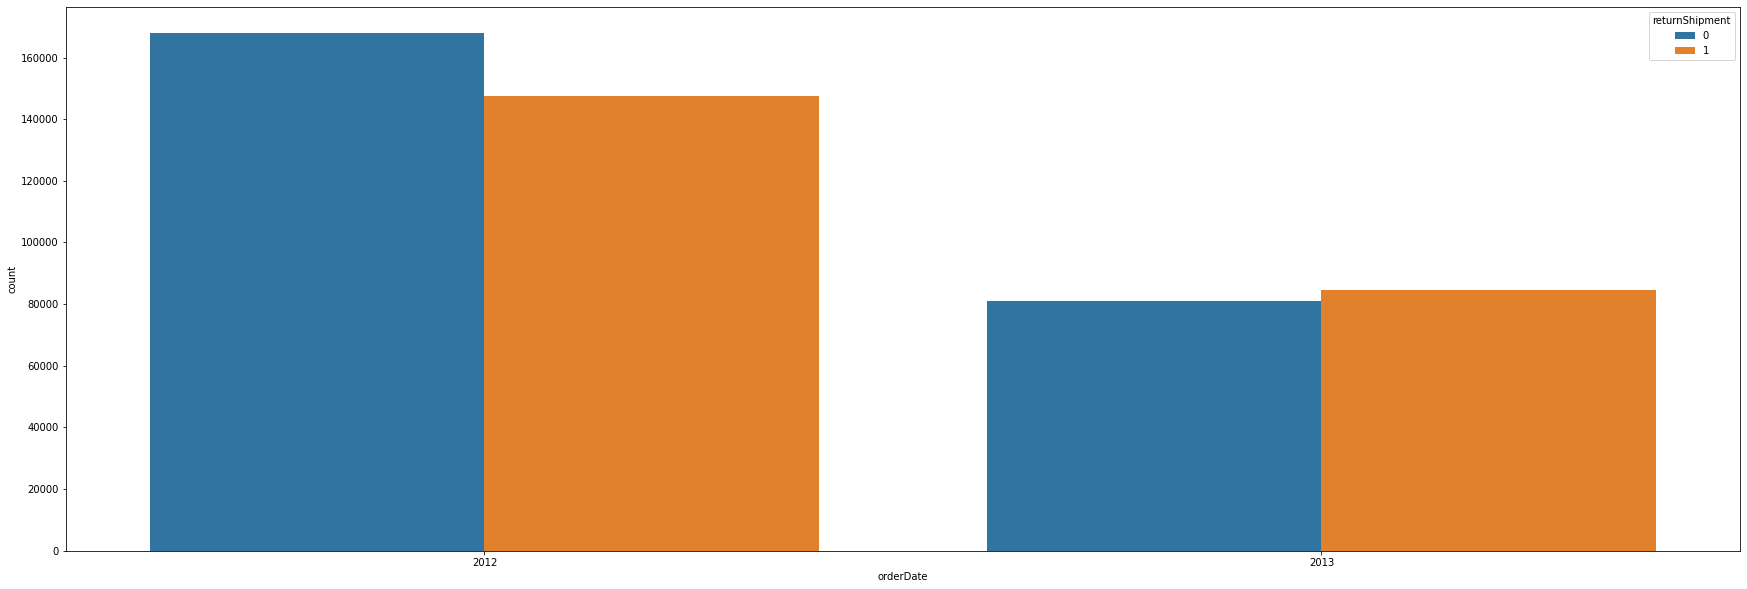

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(ax=ax, x=df2["orderDate"].dt.year,hue = "returnShipment", data=df2)

Berdasarkan grafik diatas bisa dilihat order pada tahun 2013 lebih banyak mengembalikan barang daripada 2012

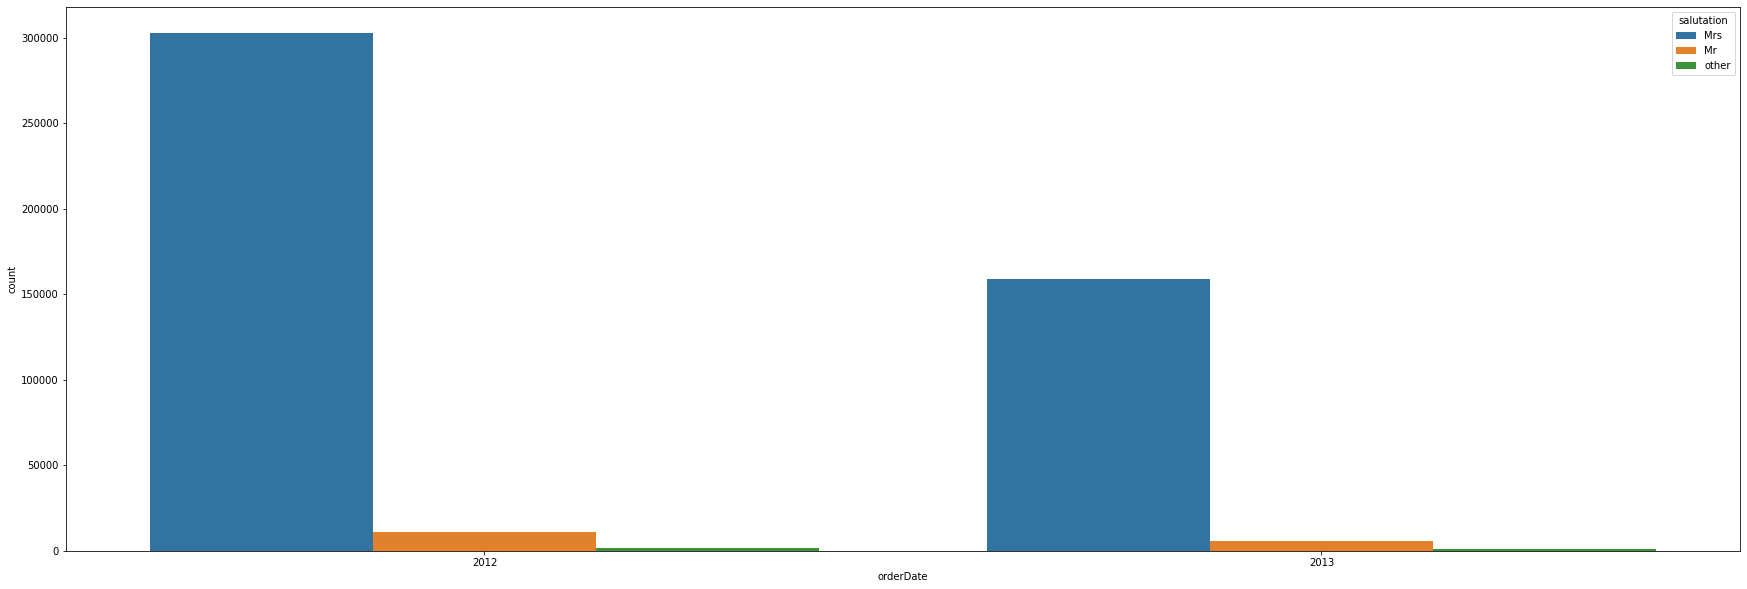

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(ax=ax, x=df2["orderDate"].dt.year,hue = "salutation", data=df2)

Berdasarkan grafik diatas bisa dilihat akun yang dimiliki perempuan atau Mrs paling banyak melakukan order pada tahun 2012 maupun tahun 2013

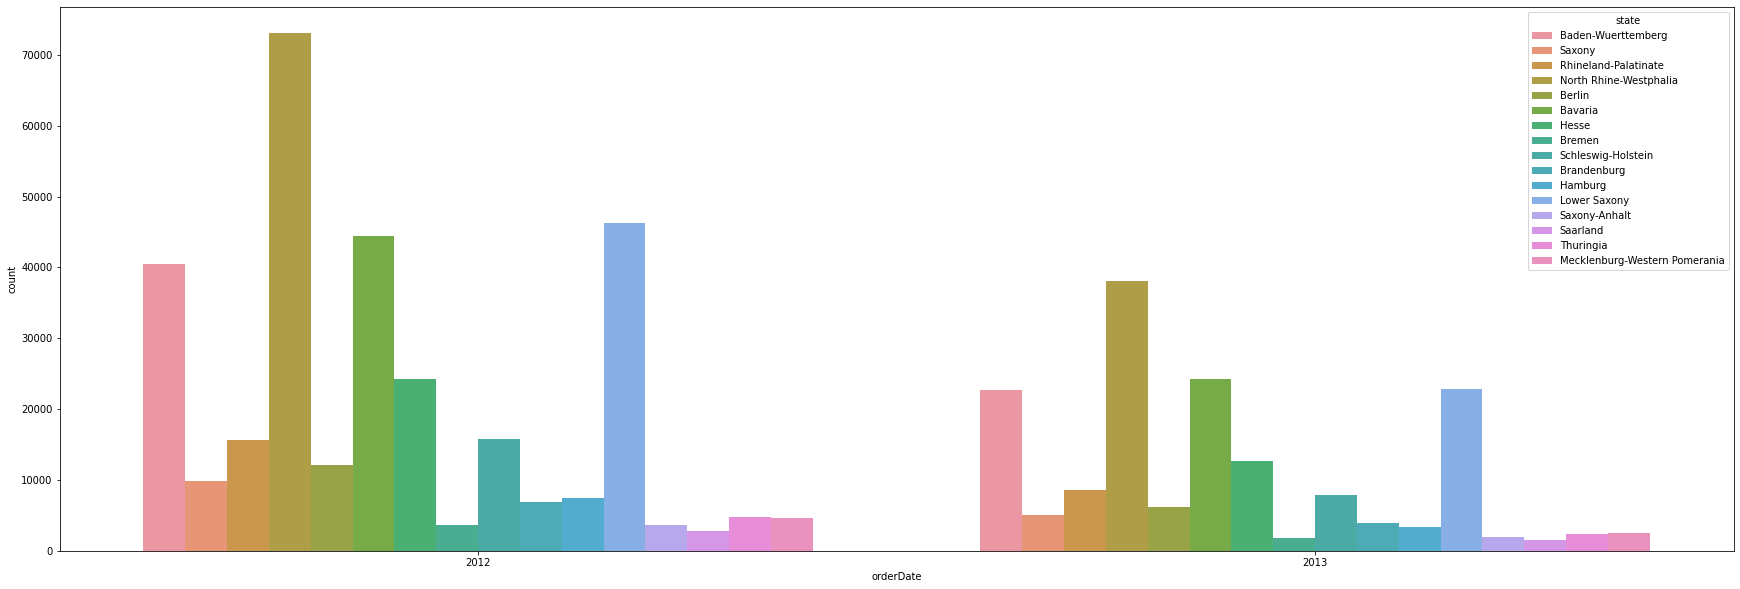

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(ax=ax, x=df2["orderDate"].dt.year,hue = "state", data=df2)

Berdasarkan grafik diatas bisa dilihat kota North Rhine-Westphalia paling banyak melakukan order pada tahun 2012 maupun tahun 2013

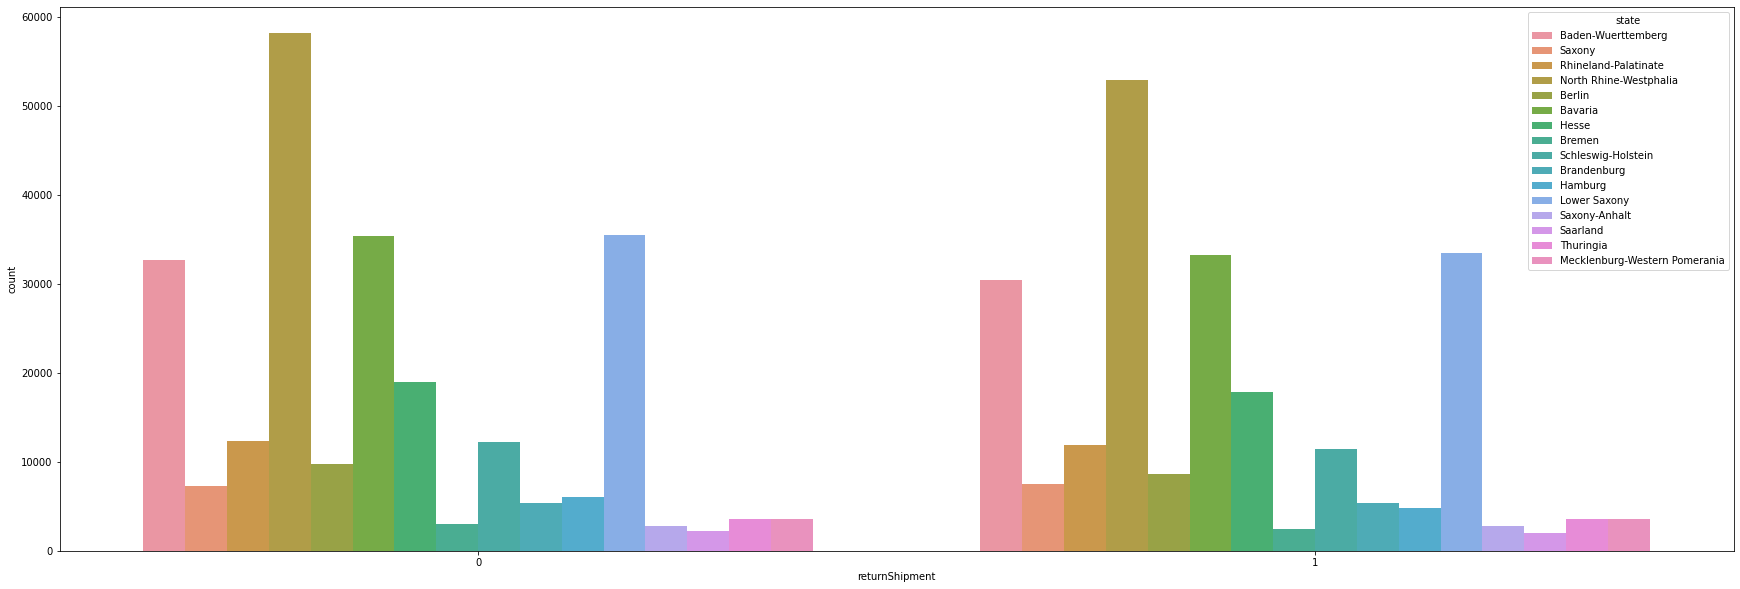

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
sns.countplot(ax=ax, x=df2["returnShipment"],hue = "state", data=df2)

Berdasarkan grafik diatas bisa dilihat kota North Rhine-Westphalia karena paling banyak order barang maka paling banyak juga mengembalikan dan tidak mengembalikan barang

In [ ]:
#melihat korelasi atribut returnShipment dengan atribut lainnya yang bertipe numerik
corr_pearson = df2.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, cmap="RdBu_r",annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()

Berdasarkan heatmap diatas dapat dilihat atribut yang paling berkorelasi dengan atribut returnShipment adalah atribut price

In [ ]:
#menghapus atribut yang tidak dipakai untuk membuat model klasifikasi
df2 = df2.drop(['customerID', 'orderItemID', 'itemID', 'manufactureID', 'customerID', 'dateOfBirth', 'creationDate'],axis=1)

In [ ]:
#mengubah tipe data atribut menjadi category untuk proses membuat model
df2["salutation"] = df2["salutation"].astype('category')
df2["state"] = df2["state"].astype('category')
df2["color"] = df2["color"].astype('category')
df2["size"] = df2["size"].astype('category')
df2["price"] = df2["price"].astype('category')
df2["returnShipment"] = df2["returnShipment"].astype('category')

In [ ]:
#untuk mengubah atribut menjadi one hot method
df2 = pd.get_dummies(data=df2, columns=['salutation','size','color','state', 'price'])
#untuk melihat jumlah kolom setelah di one hot
df2.shape